In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import pandas as pd

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2022-12-31"

In [ ]:
df = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.561531,135480400
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.846352,146322800
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.426826,118387200
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.081505,108872000
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.257111,132079200


In [ ]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.561531,135480400
1,2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.846352,146322800
2,2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.426826,118387200
3,2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.081505,108872000
4,2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.257111,132079200


In [ ]:
df=df.drop(['Date','Adj Close'], axis = 1)


In [ ]:
df.head()

,Open,High,Low,Close,Volume
0,74.059998,75.150002,73.797501,75.087502,135480400
1,74.287498,75.144997,74.125000,74.357498,146322800
2,73.447502,74.989998,73.187500,74.949997,118387200
3,74.959999,75.224998,74.370003,74.597504,108872000
4,74.290001,76.110001,74.290001,75.797501,132079200


In [ ]:
df.shape

(756, 5)

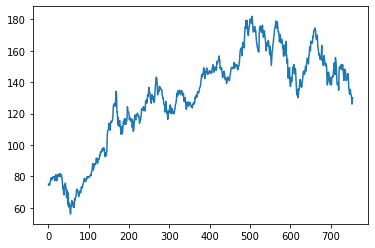

In [ ]:
plt.plot(df.Close)

In [ ]:
me100=df.Close.rolling(100).mean()
me100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
751    150.515600
752    150.157800
753    149.764699
754    149.412100
755    149.062199
Name: Close, Length: 756, dtype: float64

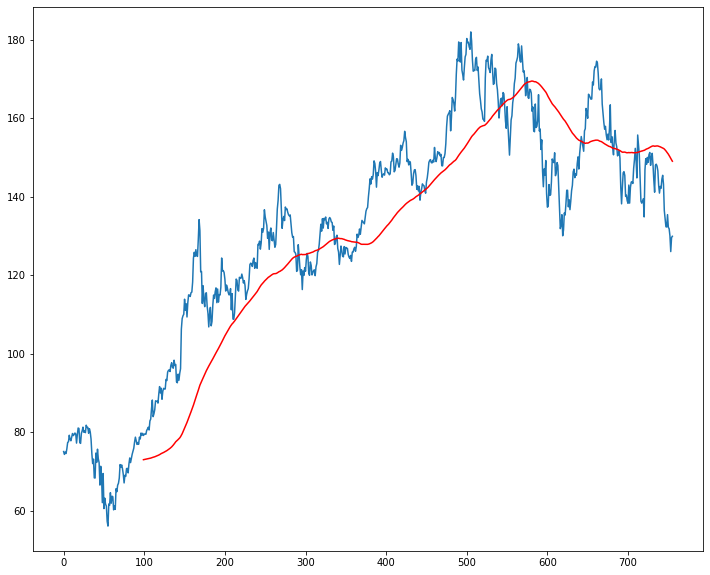

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df.Close)
plt.plot(me100, 'r')

In [ ]:
me200=df.Close.rolling(200).mean()
me200

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
751    152.1331
752    152.0096
753    151.8867
754    151.7593
755    151.6110
Name: Close, Length: 756, dtype: float64

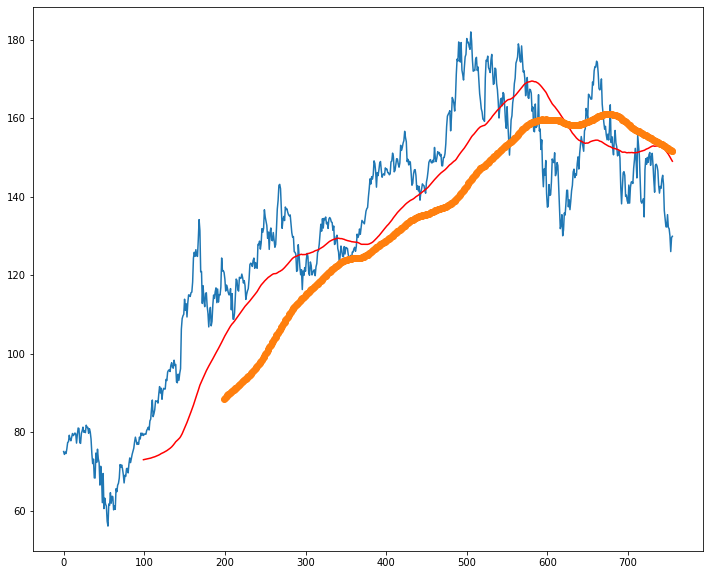

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df.Close)
plt.plot(me100, 'r')
plt.plot(me200,'o')

## Spliting the data testing and treaning

In [ ]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [ ]:
print(data_training.shape)
print(data_testing.shape)

(529, 1)
(227, 1)


In [ ]:
data_training.head()

,Close
0,75.087502
1,74.357498
2,74.949997
3,74.597504
4,75.797501


In [ ]:
data_testing.head()

,Close
529,171.660004
530,174.830002
531,176.279999
532,172.119995
533,168.639999


In [ ]:
data = df["Close"].values
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df)

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

In [ ]:
data_training_array.shape

(529, 1)

In [ ]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(429, 100, 1)

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 120)         

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
14/14 [==============================] - 17s 751ms/step - loss: 0.2180
Epoch 2/50
14/14 [==============================] - 11s 764ms/step - loss: 0.0731
Epoch 3/50
14/14 [==============================] - 9s 650ms/step - loss: 0.0560
Epoch 4/50
14/14 [==============================] - 5s 348ms/step - loss: 0.0519
Epoch 5/50
14/14 [==============================] - 5s 338ms/step - loss: 0.0491
Epoch 6/50
14/14 [==============================] - 5s 354ms/step - loss: 0.0470
Epoch 7/50
14/14 [==============================] - 5s 357ms/step - loss: 0.0457
Epoch 8/50
14/14 [==============================] - 5s 348ms/step - loss: 0.0448
Epoch 9/50
14/14 [==============================] - 5s 348ms/step - loss: 0.0440
Epoch 10/50
14/14 [==============================] - 5s 353ms/step - loss: 0.0443
Epoch 11/50
14/14 [==============================] - 5s 335ms/step - loss: 0.0431
Epoch 12/50
14/14 [==============================] - 5s 350ms/step - loss: 0.0424
Epoch 13/50
14/14 [====

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
529,171.660004
530,174.830002
531,176.279999
532,172.119995
533,168.639999


In [ ]:
data_training.head()

,Close
0,75.087502
1,74.357498
2,74.949997
3,74.597504
4,75.797501


In [ ]:
past_100_days=data_training.tail(100)
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df.head()

,Close
0,149.029999
1,148.789993
2,146.059998
3,142.940002
4,143.429993


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.41075577],
       [0.40646766],
       [0.3576916 ],
       [0.30194753],
       [0.31070205],
       [0.35393974],
       [0.37144905],
       [0.37305699],
       [0.34536352],
       [0.28354484],
       [0.29998218],
       [0.27621942],
       [0.29676603],
       [0.23405396],
       [0.26925141],
       [0.28515278],
       [0.30820072],
       [0.30123271],
       [0.29962477],
       [0.27639799],
       [0.26567812],
       [0.3165981 ],
       [0.33589419],
       [0.36644639],
       [0.40593168],
       [0.41486504],
       [0.41879574],
       [0.40468115],
       [0.40378776],
       [0.41593727],
       [0.40753989],
       [0.4740041 ],
       [0.42451322],
       [0.40950524],
       [0.42844392],
       [0.45470801],
       [0.44523868],
       [0.45095588],
       [0.43594791],
       [0.4425585 ],
       [0.3909237 ],
       [0.39003031],
       [0.42790794],
       [0.42808651],
       [0.44595322],
       [0.49044145],
       [0.56869748],
       [0.616

In [ ]:
input_data.shape

(327, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(227, 100, 1)
(227,)


## Making Prediction

In [ ]:
y_predicted=model.predict(x_test)

8/8 [==============================] - 1s 92ms/step


In [ ]:
y_predicted.shape

(227, 100, 1)

In [ ]:
y_test

array([0.81507965, 0.87171711, 0.89762379, 0.82329819, 0.76112209,
       0.7654102 , 0.83526885, 0.83098102, 0.7654102 , 0.73718076,
       0.68393802, 0.60800447, 0.65570857, 0.69340735, 0.69823117,
       0.66392711, 0.72395929, 0.71806324, 0.66339113, 0.59424702,
       0.56101492, 0.65946043, 0.58031101, 0.512596  , 0.43916378,
       0.51902803, 0.59942825, 0.61783095, 0.67786313, 0.70287669,
       0.76433824, 0.78917297, 0.8581385 , 0.86975176, 0.88547456,
       0.94550673, 0.9242453 , 0.86778641, 0.86242634, 0.93621596,
       0.87582638, 0.81811696, 0.8236556 , 0.78702877, 0.70948729,
       0.74361278, 0.79256741, 0.70126848, 0.69733805, 0.73896726,
       0.73592995, 0.72145796, 0.63873497, 0.6582099 , 0.54958023,
       0.54547096, 0.67178851, 0.56476678, 0.57030569, 0.5974629 ,
       0.71431138, 0.54904425, 0.55815618, 0.4648919 , 0.5086653 ,
       0.365553  , 0.29515809, 0.37645171, 0.34840083, 0.4145079 ,
       0.26407018, 0.20207265, 0.20636049, 0.30498484, 0.25585

In [ ]:
y_predicted

array([[[0.36408556],
        [0.5273426 ],
        [0.593016  ],
        ...,
        [0.5846778 ],
        [0.5845377 ],
        [0.5844793 ]],

       [[0.36406565],
        [0.52707267],
        [0.59272844],
        ...,
        [0.5845377 ],
        [0.5844793 ],
        [0.58448607]],

       [[0.3638129 ],
        [0.52672654],
        [0.5925328 ],
        ...,
        [0.5844793 ],
        [0.5844861 ],
        [0.5845479 ]],

       ...,

       [[0.36555505],
        [0.5285129 ],
        [0.59332836],
        ...,
        [0.5749702 ],
        [0.57461846],
        [0.57425946]],

       [[0.36550856],
        [0.52851725],
        [0.5933455 ],
        ...,
        [0.57461846],
        [0.57425946],
        [0.5739077 ]],

       [[0.36551338],
        [0.52886254],
        [0.5937285 ],
        ...,
        [0.57425946],
        [0.5739077 ],
        [0.5735743 ]]], dtype=float32)

In [ ]:
scaler.scale_

array([0.01786672])

In [ ]:
from matplotlib.scale import scale_factory
scale_factory = 1/0.02099517
y_predicted=y_predicted*scale_factory

In [ ]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

## load the save model

In [ ]:
lodaed_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
y_predicted=model.predict(x_test)

8/8 [==============================] - 1s 87ms/step
